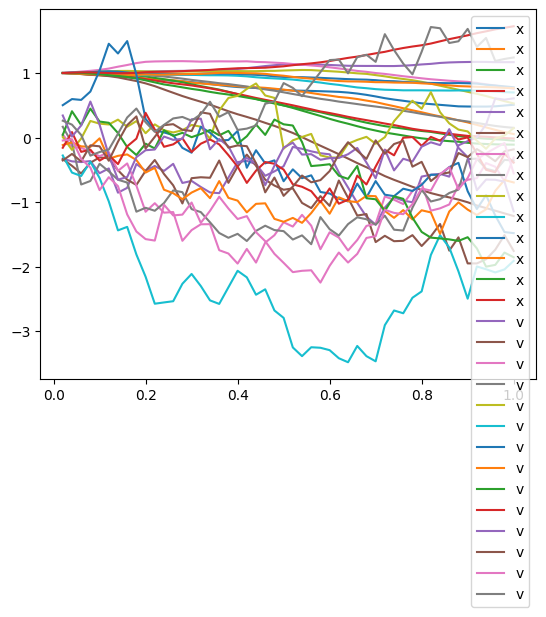

In [2]:
import jax
import jax.numpy as jnp
import jax.random as jr
import jax.tree_util as jtu
from diffrax import (
    diffeqsolve,
    Euler,
    LangevinTerm,
    SaveAt,
    SpaceTimeLevyArea,
    VirtualBrownianTree,
)
from drawing_and_evaluating import plot_sol_langevin


x0 = {
    "a": (jnp.ones((2,)), jnp.ones((2,)), jnp.ones((2,))),
    "b": (
        jnp.ones((5,)),
        jnp.ones((3,)),
    ),
}
v0 = {
    "a": (jnp.zeros((2,)), jnp.zeros((2,)), jnp.zeros((2,))),
    "b": (
        jnp.zeros((5,)),
        jnp.zeros((3,)),
    ),
}
y0 = (x0, v0)

g1 = {
    "a": jnp.ones((2,)),
    "b": (
        jnp.ones(()),
        jnp.ones((3,)),
    ),
}

u1 = {"a": (jnp.ones(()), 1.0, jnp.ones((2,))), "b": jnp.ones(())}


def grad_f(x):
    xa = x["a"]
    xb = x["b"]
    return {"a": jtu.tree_map(lambda _x: 2 * _x, xa), "b": xb}


args = g1, u1, grad_f

vbt_shape = jtu.tree_map(lambda _x: jax.ShapeDtypeStruct(_x.shape, _x.dtype), x0)

vbt = VirtualBrownianTree(0.0, 1.0, 0.01, vbt_shape, jr.key(0), SpaceTimeLevyArea)

lt = LangevinTerm(args, vbt, x0)

sol = diffeqsolve(lt, Euler(), 0.0, 1.0, 0.02, y0, None, saveat=SaveAt(steps=True))
plot_sol_langevin(sol)